<a href="https://colab.research.google.com/github/Ch-Vignesh/sample/blob/main/stockk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reference
https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

In [ ]:
!pip install -q yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 15.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 85.1 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade yfinance
!pip install --upgrade pandas-datareader yfinance

!pip install pandas-datareader
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# yf.pdr_override()  # Remove or comment out this line if unnecessary

# For time stamps
from datetime import datetime

In [ ]:
from keras.models import load_model

def saveModel(model,modelName):
  model.save(modelName)  # creates a HDF5 file 'my_model.h5'

def loadModel(modelName):
# returns a compiled model
# identical to the previous one
  model = load_model(modelName)
  return model

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['ICICIBANK.NS','HDFCBANK.NS','UNIONBANK.NS','SBIN.NS']

company_name = ["ICICIBANK","HDFCBANK","UNIONBANK","SBIN"]

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for company, stock in zip(company_name, tech_list):
    globals()[company] = yf.download(stock, start, end)

company_list = [ICICIBANK,HDFCBANK,UNIONBANK,SBIN]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,...,UNIONBANK.NS,UNIONBANK.NS,UNIONBANK.NS,UNIONBANK.NS,UNIONBANK.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-19,NaN,NaN,NaN,NaN,NaN,SBIN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,832.799988,838.000000,820.200012,824.599976,9453398.0
2024-12-20,NaN,NaN,NaN,NaN,NaN,SBIN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,812.000000,836.000000,810.000000,834.900024,10244198.0
2024-12-23,NaN,NaN,NaN,NaN,NaN,SBIN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,821.150024,824.000000,812.200012,817.299988,4933200.0
2024-12-24,NaN,NaN,NaN,NaN,NaN,SBIN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,812.049988,826.200012,809.200012,824.250000,10602771.0
2024-12-26,NaN,NaN,NaN,NaN,NaN,SBIN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,812.450012,822.849976,808.000000,813.000000,8318714.0
2024-12-27,NaN,NaN,NaN,NaN,NaN,SBIN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,799.650024,818.299988,797.200012,816.299988,10649800.0
2024-12-30,NaN,NaN,NaN,NaN,NaN,SBIN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,788.299988,807.950012,785.000000,802.000000,21515438.0
2024-12-31,NaN,NaN,NaN,NaN,NaN,SBIN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,794.950012,799.200012,786.000000,786.950012,9086044.0


In [ ]:
# Summary Stats
SBIN.describe()

Price,Close,High,Low,Open,Volume
Ticker,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,786.895730,795.749999,778.290667,787.482429,1.755012e+07
std,67.779833,68.126080,67.654050,68.504506,1.166627e+07
min,595.119995,612.085486,590.743437,599.890036,1.637141e+06
25%,754.226868,761.996554,745.043356,754.337516,1.136701e+07
50%,803.434692,813.900024,795.825012,804.250000,1.474697e+07
75%,832.700012,841.812500,824.049988,833.724976,2.003143e+07
max,905.650024,912.000000,883.299988,897.000000,1.223812e+08


In [ ]:
# General info
SBIN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2024-01-03 to 2025-01-02
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, SBIN.NS)   246 non-null    float64
 1   (High, SBIN.NS)    246 non-null    float64
 2   (Low, SBIN.NS)     246 non-null    float64
 3   (Open, SBIN.NS)    246 non-null    float64
 4   (Volume, SBIN.NS)  246 non-null    int64  
 5   (company_name, )   246 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.5+ KB


In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    # Check if 'Adj Close' column exists before plotting
    if 'Adj Close' in company.columns:
        plt.subplot(2, 2, i)
        company['Adj Close'].plot()
        plt.ylabel('Adj Close')
        plt.xlabel(None)
        plt.title(f"Closing Price of {tech_list[i - 1]}")
    else:
        print(f"DataFrame for {tech_list[i - 1]} does not have 'Adj Close' column.")

plt.tight_layout()

DataFrame for ICICIBANK.NS does not have 'Adj Close' column.
DataFrame for HDFCBANK.NS does not have 'Adj Close' column.
DataFrame for UNIONBANK.NS does not have 'Adj Close' column.
DataFrame for SBIN.NS does not have 'Adj Close' column.


<Figure size 1500x1000 with 0 Axes>

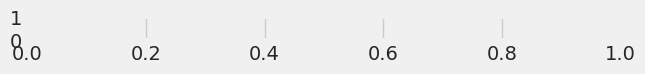

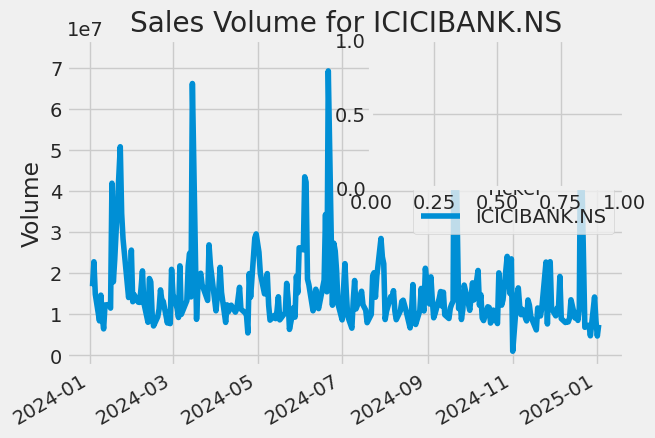

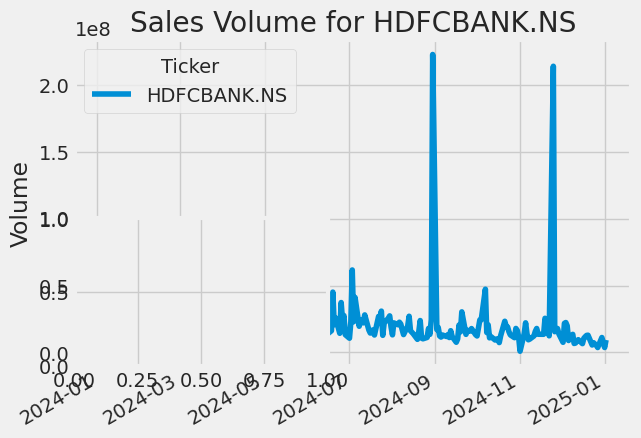

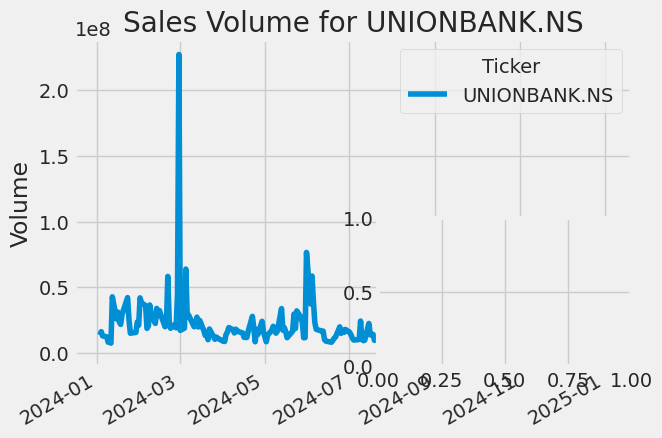

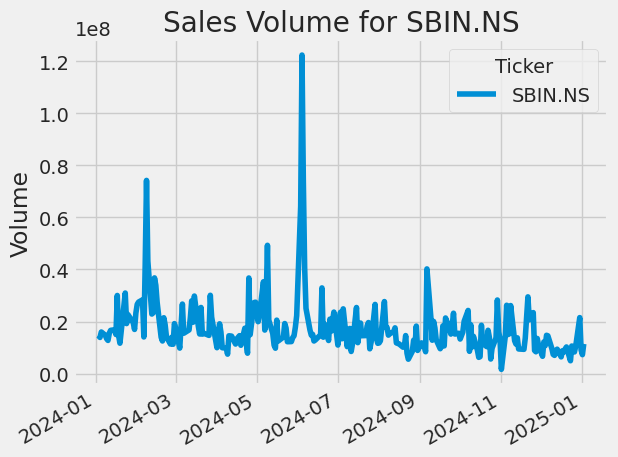

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

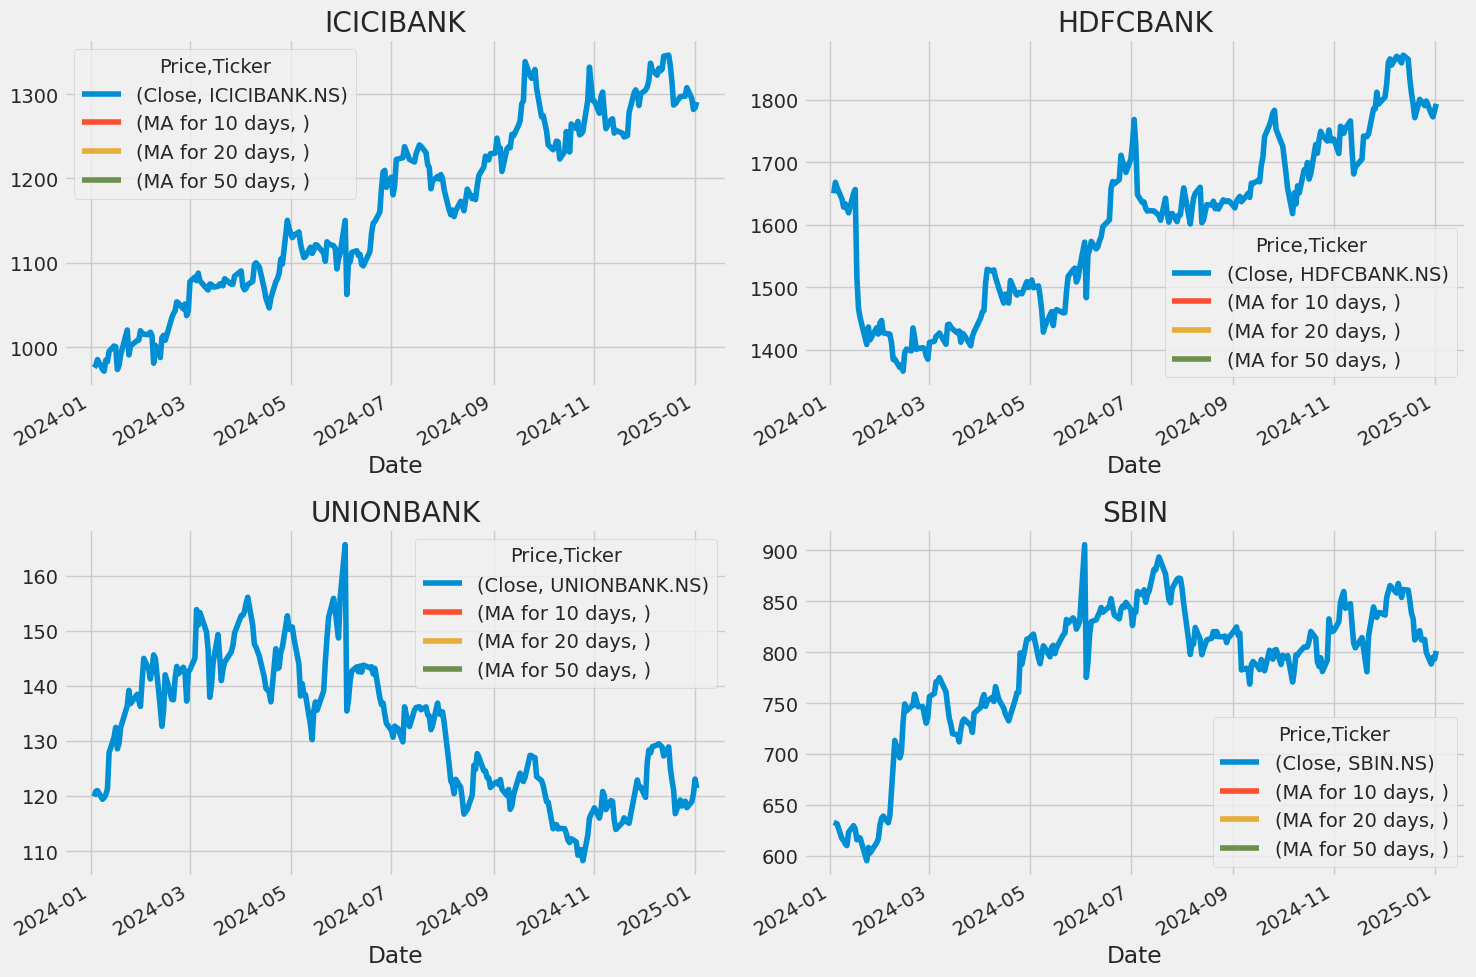

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        # Use 'Close' column instead of 'Adj Close'
        company[column_name] = company['Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ICICIBANK[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ICICIBANK')

HDFCBANK[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('HDFCBANK')

UNIONBANK[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('UNIONBANK')

SBIN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('SBIN')

fig.tight_layout()


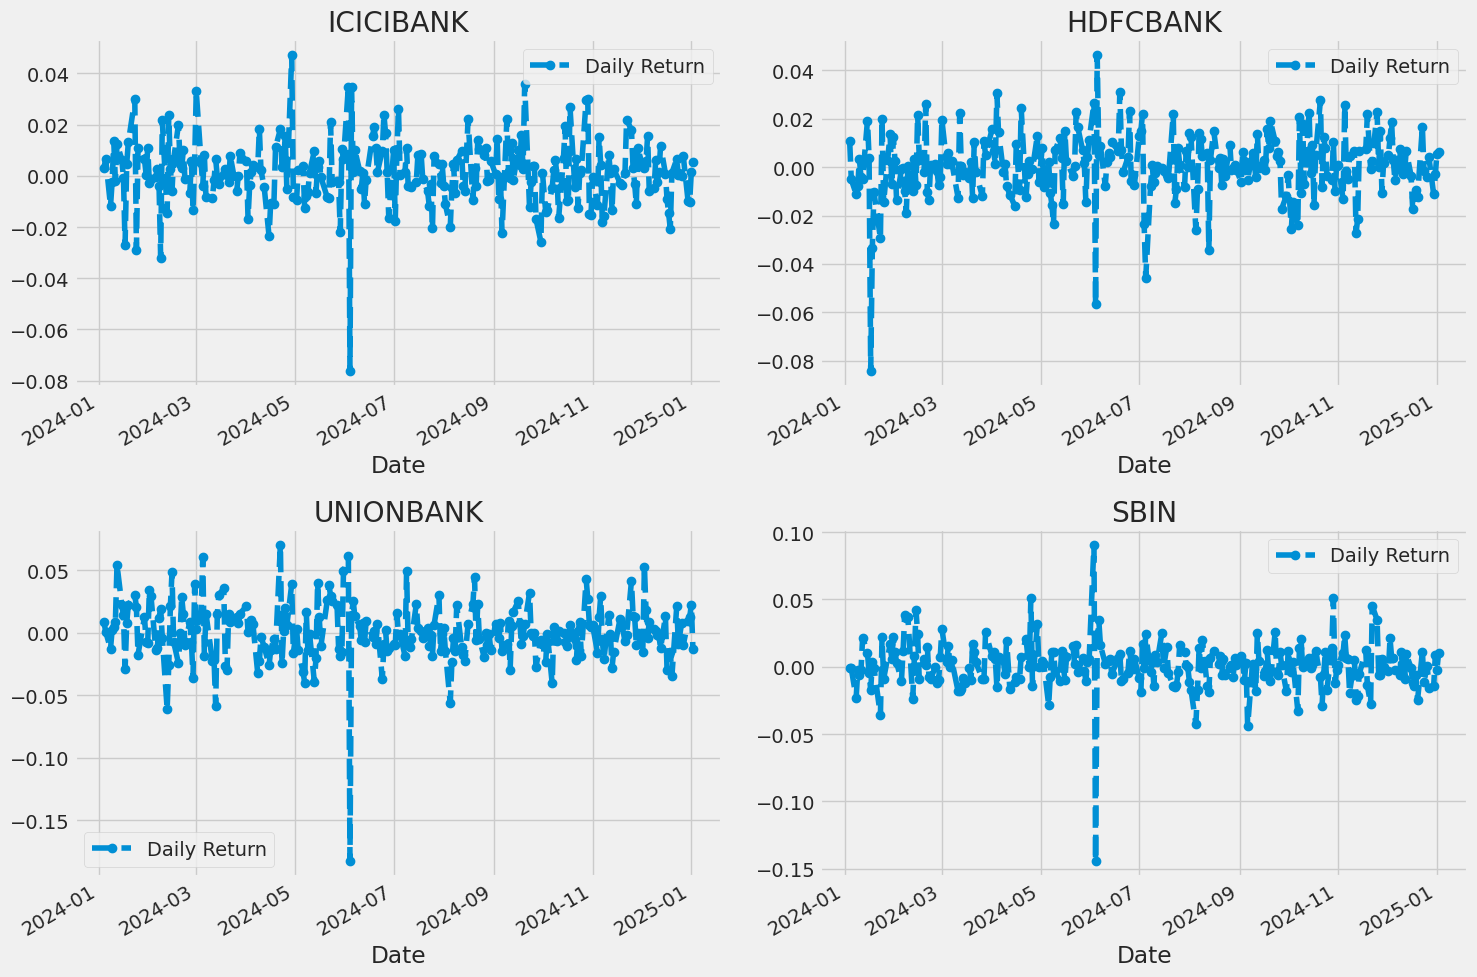

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ICICIBANK['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('ICICIBANK')

HDFCBANK['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('HDFCBANK')

UNIONBANK['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('UNIONBANK')

SBIN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('SBIN')

fig.tight_layout()

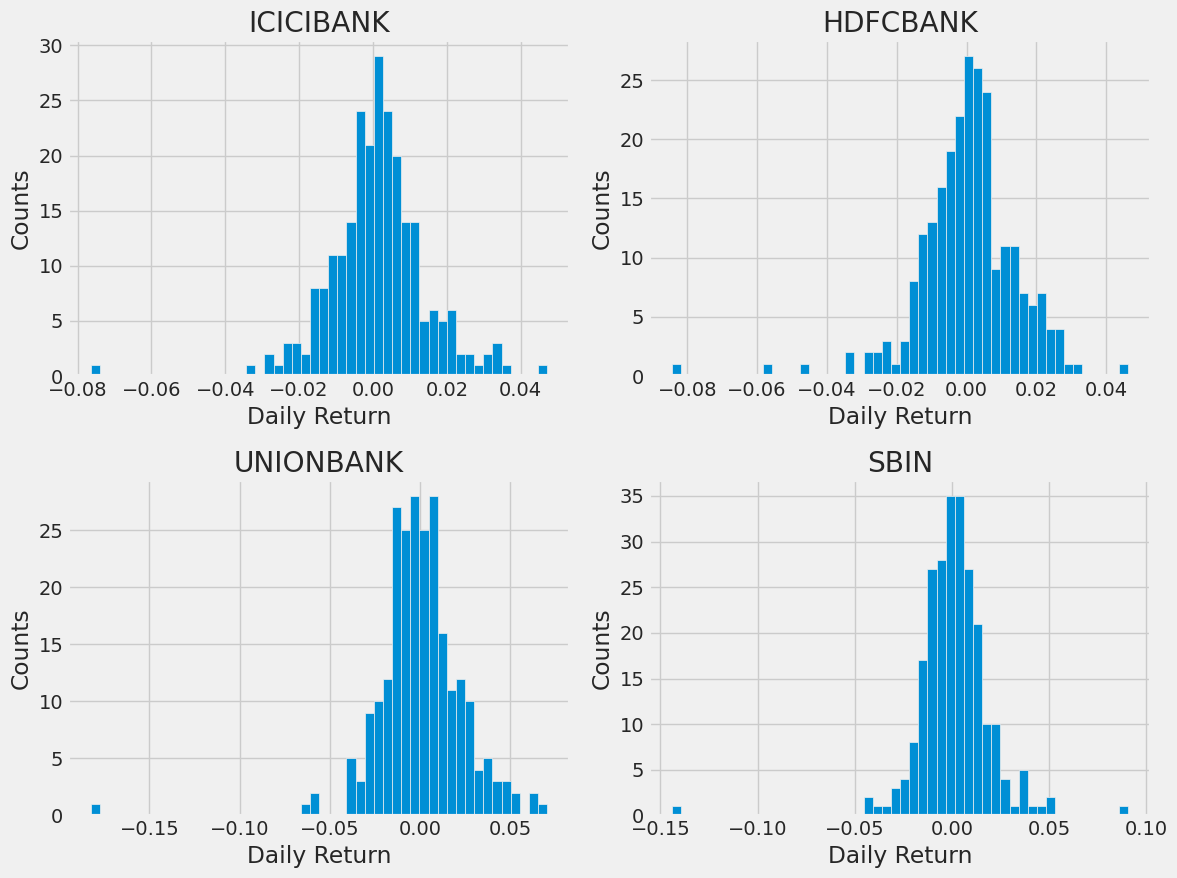

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
import yfinance as yf
import pandas as pd

# The tech stocks we'll use for this analysis
tech_list = ['ICICIBANK.NS','HDFCBANK.NS','UNIONBANK.NS','SBIN.NS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data using yfinance
all_data = yf.download(tech_list, start=start, end=end)

# If 'Close' column exists, then proceed
# Note: yfinance typically uses 'Close' instead of 'Adj Close'
if 'Close' in all_data.columns:
    closing_df = all_data['Close']
    # Make a new tech returns DataFrame
    tech_rets = closing_df.pct_change()
    print(tech_rets.head())  # Print the head to check if it worked
else:
    print("Error: 'Close' column not found in the downloaded data.")

[*********************100%***********************]  4 of 4 completed

Ticker      HDFCBANK.NS  ICICIBANK.NS   SBIN.NS  UNIONBANK.NS
Date                                                         
2024-01-03          NaN           NaN       NaN           NaN
2024-01-04     0.010730      0.003150 -0.001088      0.008127
2024-01-05    -0.005116      0.006635 -0.001245      0.000806
2024-01-08    -0.011146     -0.011774 -0.023289     -0.012888
2024-01-09    -0.007785     -0.002291 -0.002552      0.002448


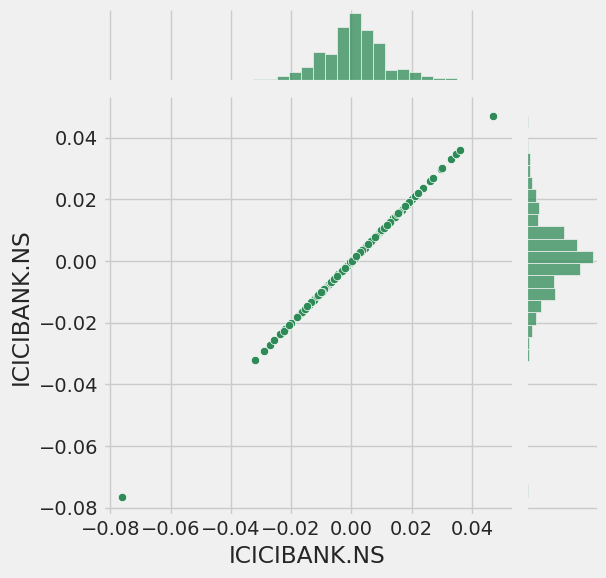

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='ICICIBANK.NS', y='ICICIBANK.NS', data=tech_rets, kind='scatter', color='seagreen')

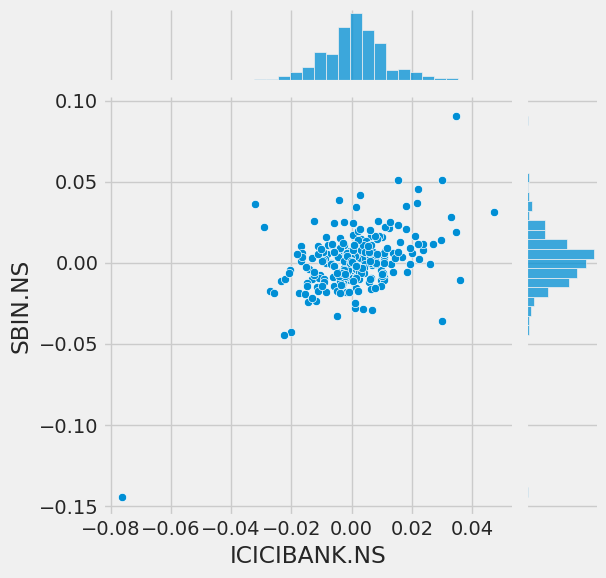

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='ICICIBANK.NS', y='SBIN.NS', data=tech_rets, kind='scatter')

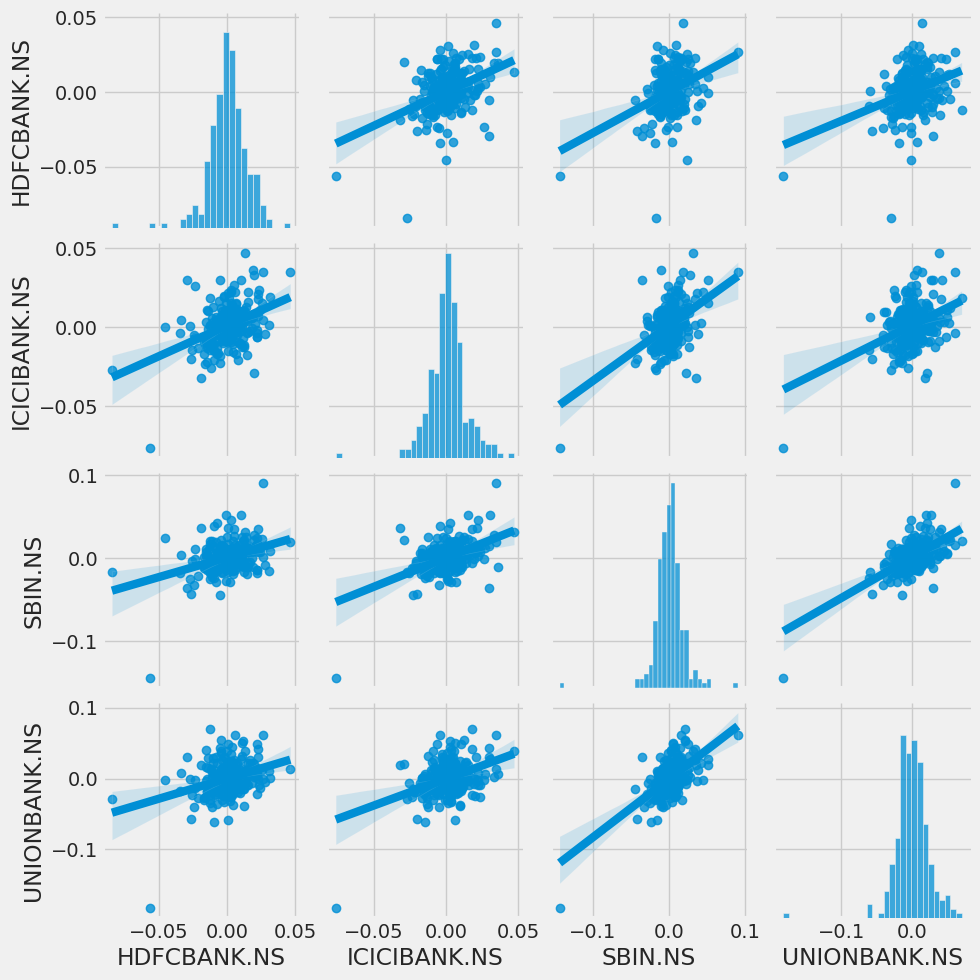

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

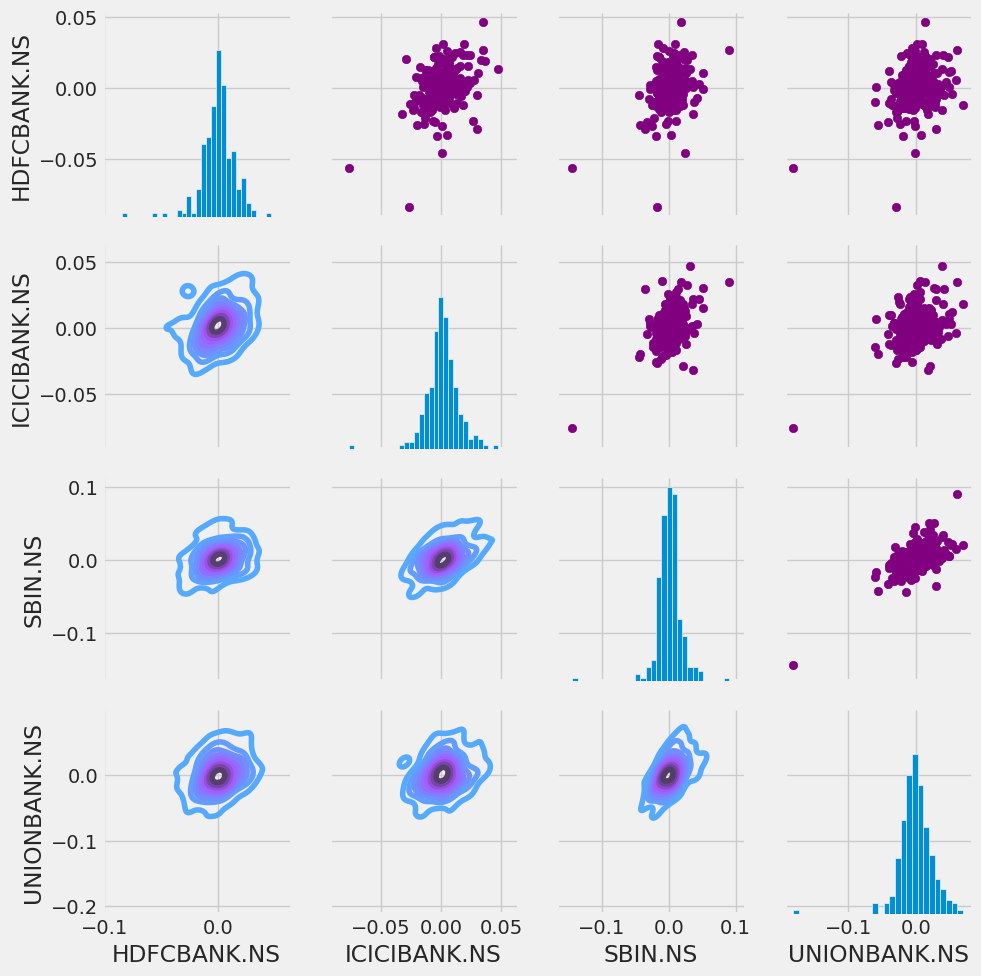

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

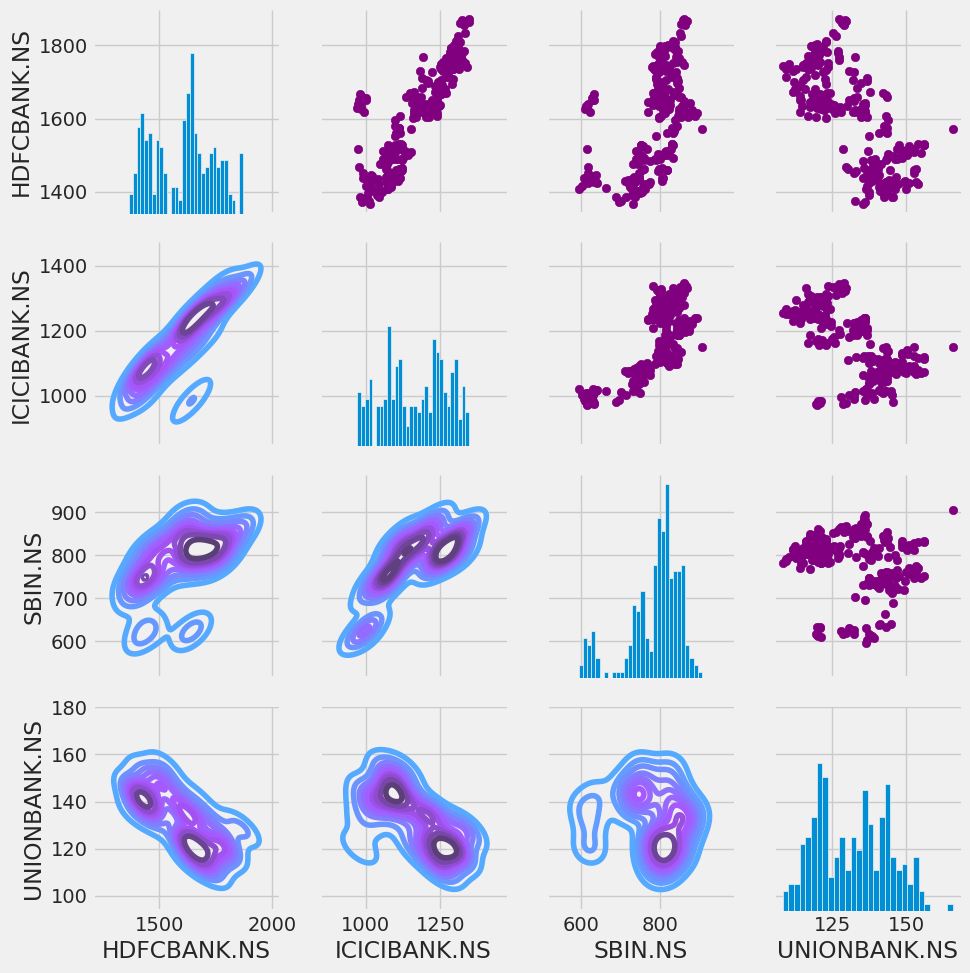

In [ ]:
#Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

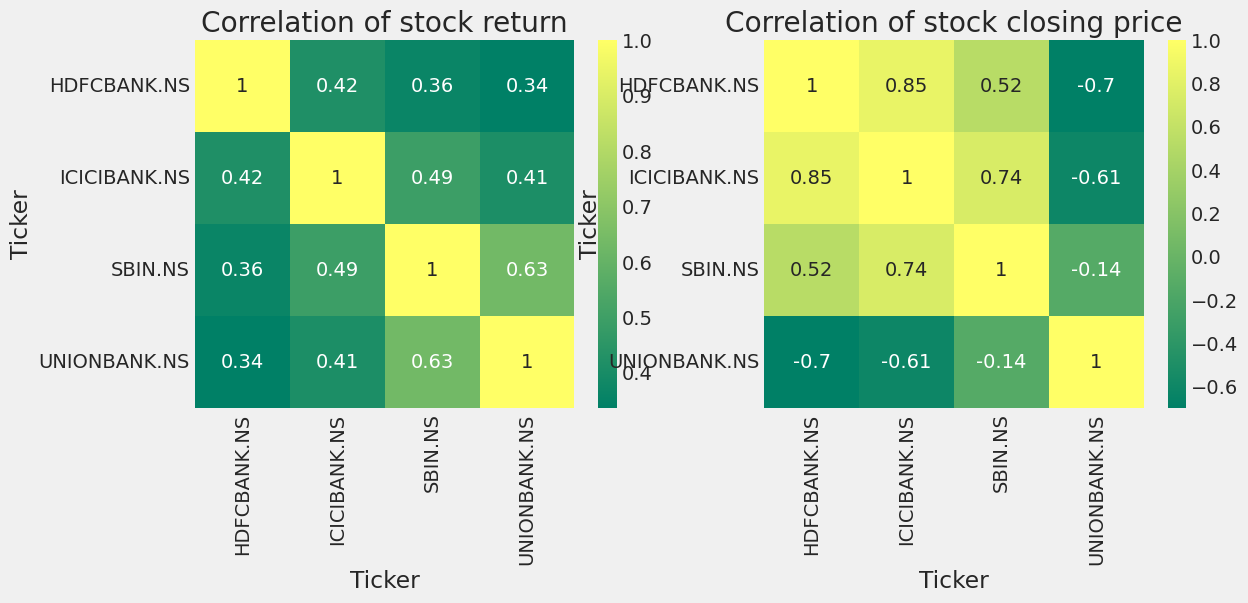

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

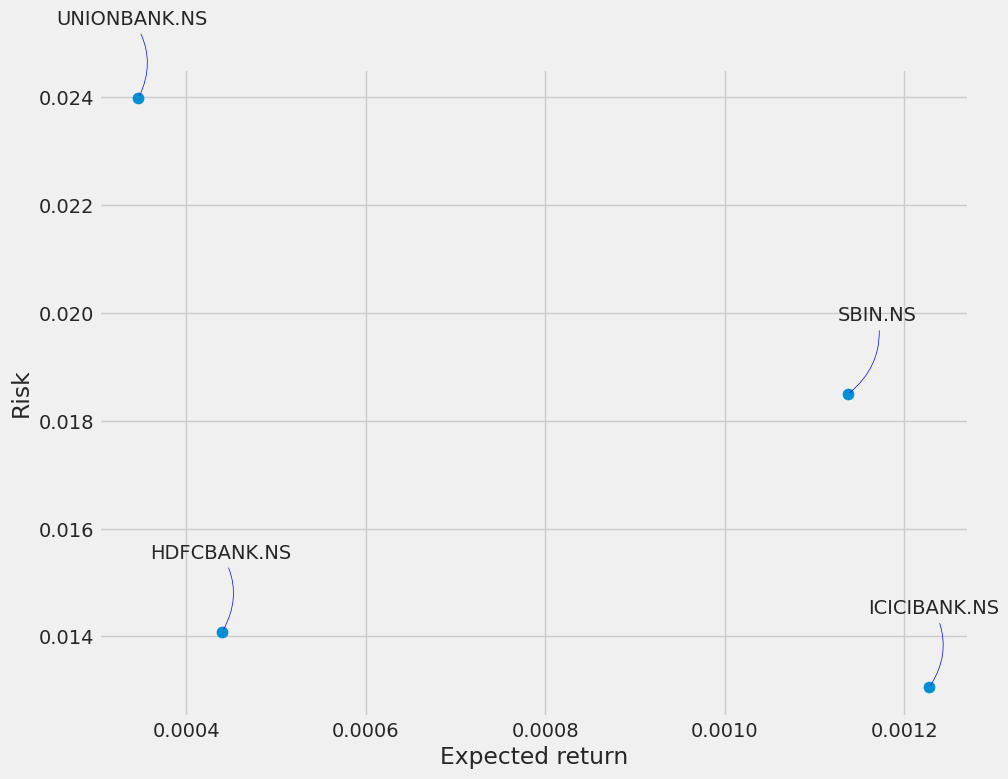

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
from datetime import datetime

# Get the stock quote using yfinance directly
df = yf.download('ICICIBANK.NS', start='2012-01-01', end=datetime.now())

# Show the data
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS
Date,,,,,
2012-01-02,107.616196,108.071966,105.847184,106.627404,14927627
2012-01-03,112.135284,112.629680,108.921711,108.921711,18500311
2012-01-04,114.808090,115.719643,112.845962,113.309460,32952243
2012-01-05,115.580627,116.924767,114.174678,115.101674,23203350
2012-01-06,116.136795,117.882623,112.475167,114.638152,22273933
...,...,...,...,...,...
2024-12-27,1307.550049,1315.949951,1298.550049,1298.550049,4756066
2024-12-30,1294.650024,1326.500000,1289.449951,1304.949951,14207425


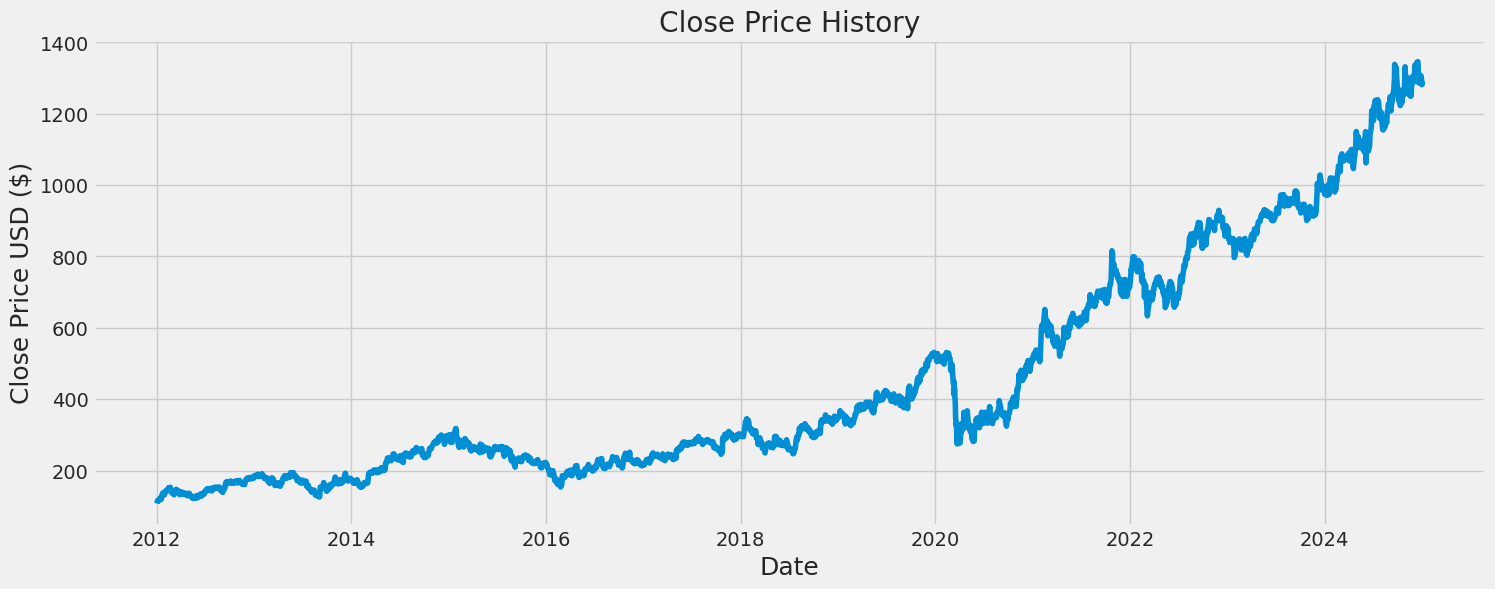

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3046

In [ ]:
# Create a new dataframe with only the 'Close' column
# Check if the 'Close' column exists before filtering
if 'Close' in df.columns:
    data = df.filter(['Close'])
else:
    # Handle the case where 'Close' column is not found
    # For example, you can try using 'Adj Close' instead:
    if 'Adj Close' in df.columns:
        data = df.filter(['Adj Close'])
        print("Using 'Adj Close' column instead of 'Close'")
    else:
        raise KeyError("Neither 'Close' nor 'Adj Close' column found in the DataFrame")
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

3046

In [50]:
#...other imports...
from sklearn.preprocessing import MinMaxScaler #import MinMaxScaler

# Check if 'Close' column exists, if not try 'Adj Close', then try 'Price'
# Finally, if none of them are found, try the first column of the dataframe
if 'Close' in df.columns:
    data = df[['Close']] # Use double brackets to keep it as a DataFrame
elif 'Adj Close' in df.columns:
    data = df[['Adj Close']] # Use double brackets to keep it as a DataFrame
    print("Using 'Adj Close' column instead of 'Close'")
elif 'Price' in df.columns:
    data = df[['Price']]  # Use double brackets to keep it as a DataFrame
    print("Using 'Price' column instead of 'Close' or 'Adj Close'")
else:
    # This line handles the case where none of the above are found
    # It uses the first column from the DataFrame.
    data = df.iloc[:, 0:1]  # Using iloc to select the first column
    print("Using the first column of the DataFrame for data.")


# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)  # Define scaled_data here

scaled_data

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# ...rest of the code...

# Build the LSTM model

In [54]:
#...other imports...
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
#The issue was in this line. np.azrray is not a valid function. It should be np.array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

# Train the model immediately after compiling and preparing the data
model.fit(x_train, y_train, batch_size=1, epochs=1)

[array([0.        , 0.00364889, 0.00580702, 0.00643079, 0.00687986,
       0.00639335, 0.00972413, 0.01042896, 0.01058491, 0.01158911,
       0.01185733, 0.01110261, 0.0091191 , 0.01255591, 0.01820079,
       0.01998467, 0.02388932, 0.02289133, 0.02387684, 0.0194171 ,
       0.02564825, 0.02412011, 0.0256732 , 0.02741347, 0.02887922,
       0.0300893 , 0.02793114, 0.03034505, 0.02917864, 0.02970258,
       0.03083155, 0.03550339, 0.03396274, 0.03555952, 0.03676957,
       0.03257802, 0.03086277, 0.02932837, 0.02381445, 0.02672734,
       0.02616596, 0.0233217 , 0.02571687, 0.02168126, 0.01954808,
       0.02040883, 0.02715148, 0.02899154, 0.02910376, 0.032104  ,
       0.02914747, 0.02758809, 0.02636556, 0.02645288, 0.02962774,
       0.02533638, 0.02669615, 0.02194947, 0.02262312, 0.02030902])]
[0.019859934432796156]

[array([0.        , 0.00364889, 0.00580702, 0.00643079, 0.00687986,
       0.00639335, 0.00972413, 0.01042896, 0.01058491, 0.01158911,
       0.01185733, 0.01110261, 0.0

In [52]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
#The issue was in this line. np.azrray is not a valid function. It should be np.array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.00364889, 0.00580702, 0.00643079, 0.00687986,
       0.00639335, 0.00972413, 0.01042896, 0.01058491, 0.01158911,
       0.01185733, 0.01110261, 0.0091191 , 0.01255591, 0.01820079,
       0.01998467, 0.02388932, 0.02289133, 0.02387684, 0.0194171 ,
       0.02564825, 0.02412011, 0.0256732 , 0.02741347, 0.02887922,
       0.0300893 , 0.02793114, 0.03034505, 0.02917864, 0.02970258,
       0.03083155, 0.03550339, 0.03396274, 0.03555952, 0.03676957,
       0.03257802, 0.03086277, 0.02932837, 0.02381445, 0.02672734,
       0.02616596, 0.0233217 , 0.02571687, 0.02168126, 0.01954808,
       0.02040883, 0.02715148, 0.02899154, 0.02910376, 0.032104  ,
       0.02914747, 0.02758809, 0.02636556, 0.02645288, 0.02962774,
       0.02533638, 0.02669615, 0.02194947, 0.02262312, 0.02030902])]
[0.019859934432796156]

[array([0.        , 0.00364889, 0.00580702, 0.00643079, 0.00687986,
       0.00639335, 0.00972413, 0.01042896, 0.01058491, 0.01158911,
       0.01185733, 0.01110261, 0.0

# Train the model

In [55]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2986/2986 [==============================] - 62s 21ms/step - loss: 3.8711e-04


# Get the models predicted price values

In [56]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 24ms/step


50.306135198812434

# Plot the data

<ipython-input-57-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


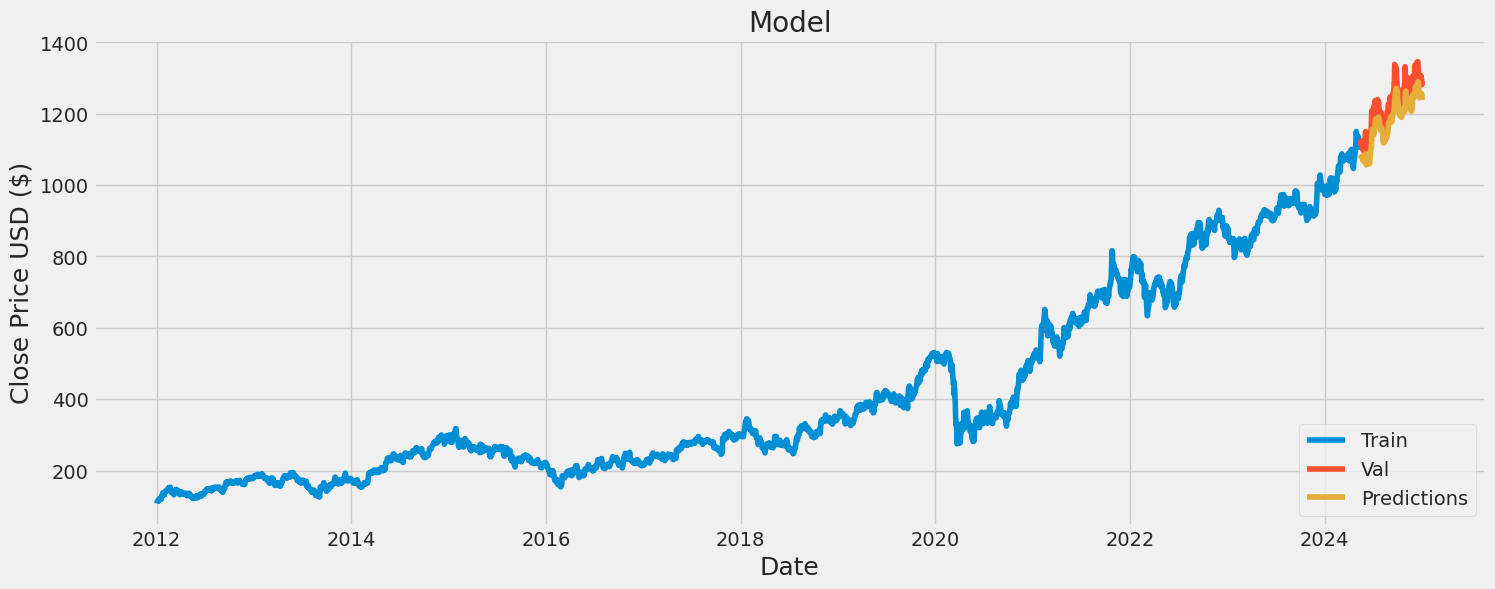

In [57]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [58]:
# Show the valid and predicted prices
valid

Price,Close,Predictions
Ticker,ICICIBANK.NS,
Date,,
2024-05-14,1110.985840,1072.880737
2024-05-15,1114.753296,1073.995239
2024-05-16,1121.396118,1075.376099
2024-05-17,1120.850830,1078.906372
2024-05-21,1111.382324,1080.765991
...,...,...
2024-12-27,1307.550049,1251.426147
2024-12-30,1294.650024,1256.884766


Data Cleaning

Feature engineering

Split Training Vs Test data